<a href="https://colab.research.google.com/github/mauriziobrt/schaeffer-dataset/blob/main/riffusion_generation_schaeffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare environment

In [ ]:
#@title Install dependencies
!pip install diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 34.5 MB/s eta 0:00:00


In [ ]:
#@title Install Converter
!git clone https://github.com/mauriziobrt/riffusion_fix_image_audio.git
%pip install argh audiosegment

Cloning into 'riffusion_fix_image_audio'...
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 713 (delta 283), reused 234 (delta 227), pack-reused 342
Receiving objects: 100% (713/713), 8.26 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (432/432), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 797.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73464 sha256=0a31071b954e4c4feaf5f5aa15ab11a287f77374609db458163abba6e04c4299
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


In [ ]:
#@title Move riffusion outside of folder else conversion won't work
!mv "/content/riffusion_fix_image_audio/riffusion/" "/content/riffusion/"

In [ ]:
#@title Import libraries
import pydub
import importlib
from riffusion.spectrogram_params import SpectrogramParams
from riffusion.spectrogram_converter import SpectrogramConverter
from riffusion.spectrogram_image_converter import SpectrogramImageConverter

In [ ]:
#@title Instantiate converters
param = SpectrogramParams()
spec_conv = SpectrogramConverter(params = param)
spec_img_conv = SpectrogramImageConverter(params= param)
SpectrogramConverter(params= param)

In [ ]:
#@title Load pipeline
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1").to("cuda")
pipeline.load_lora_weights("mrzbrt/schaeffer-lora", weight_name="checkpoint-40000/pytorch_lora_weights.safetensors")
#image = pipeline("A pulsar synthesis articulated sound that starts with voice shimmering and ends with a granular synth, distorted").images[0]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:232: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration file. Please make sure to upda

pytorch_lora_weights.safetensors:   0%|          | 0.00/3.23M [00:00<?, ?B/s]

# Generation

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

Example captions:
- "A pulsar synthesis articulated sound that starts with voice shimmering and ends with a granular synth, distorted"
- "Wildly modulated pulsar synthesis with pitch and frequency shift generate a wobbly and unpredictable sound object which crosses the line between rhythm and pitch surprising the listener."


In [ ]:
#@title Parameters for the generation sound objects
images_nr = 4 # @param {type:"integer"}
prompt = "An FM/pulsar synthesis hybrid algorithm generating a wobbly drone sound object with pulsing noise in the background. Slowly moving soft and harsh at times this sound is reminiscent of the deep sea like a glimpse of bioluminescence in the darkness." # @param {type:"string"}

Since the dataset is quite small, it is suggested to use terms and caption within the dataset as starting points. You can find the dataset at this link [schaeffer-dataset](https://huggingface.co/datasets/dbschaeffer/schaeffer_thesis_corrected/viewer)

In [ ]:
#@title Create random seeds
import random
seeds = []
for i in range(images_nr):
  seeds.append(random.randint(0, 4294967295))

print(seeds)

[3757343231, 1012962033, 4106310085, 564427072]


In [ ]:
#@title Load generator
import torch

generator = [torch.Generator(device="cuda").manual_seed(i) for i in seeds]

In [ ]:
#@title Start Generation
images = pipeline(prompt, generator=generator, num_images_per_prompt=images_nr).images
audios = []
for element in images:
  audios.append(spec_img_conv.audio_from_spectrogram_image(image = element))

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [ ]:
#@title Now choose which index sounds better for you, if they are all bad re-generate new ones.
index = 1 #@param {type: "integer"}
audios[index]

#@markdown Keep the index where you want it, it will be reused fo newer generations!

In [ ]:
#@title generate from fixed seed if you want!
list_prompt = "An FM/pulsar synthesis hybrid algorithm generating a wobbly drone sound object with pulsing noise in the background. Slowly moving soft and harsh at times this sound is reminiscent of the deep sea like a glimpse of bioluminescence in the darkness."

prompt = [prompt + t for t in [", articulated", ", complex", ", slow decay", ", marked onset"]]
generator = [torch.Generator(device="cuda").manual_seed(465890864) for i in range(4)]

In [ ]:
#@title Fix prompt and decide from which seed to start
prompt = [prompt + t for t in [", articulated", ", complex", ", slow decay", ", marked onset"]]
generator = [torch.Generator(device="cuda").manual_seed(seeds[index]) for i in range(4)]

In [ ]:
#@title Generate an example similar to the index you chose
images = pipeline(prompt, generator=generator).images
audios = []
for element in images:
  audios.append(spec_img_conv.audio_from_spectrogram_image(image = element))

  0%|          | 0/50 [00:00<?, ?it/s]

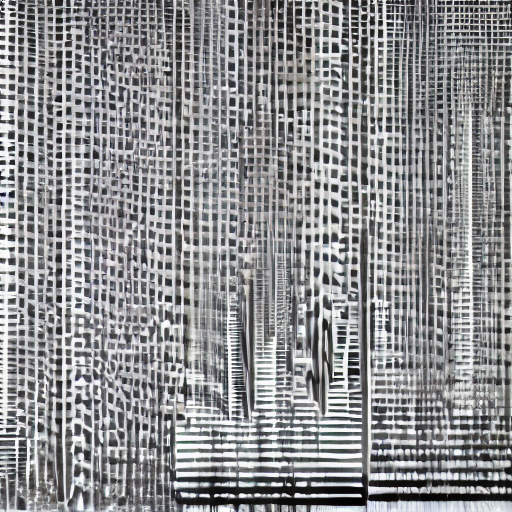

In [ ]:
images[2]

In [ ]:
#@title Play the sounds you just generated
index_new = 3 #@param {type: "integer"}
audios[index_new]

#Download generated samples

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!mkdir files

In [ ]:
filename = str(seeds[index])+ ".mp3"
filepathname = "files/" + filename
audios[index].export(filepathname, format="mp3")

<_io.BufferedRandom name='files/1516107084.mp3'>

In [ ]:
import json

sound_object_dict = {"filename": filename,  "caption": prompt}

#sound_object_dict["filename"] = filename
#sound_object_dict["seed"] = seeds[index]
#sound_object_dict["caption"] = prompt
json_name = "files/" + str(seeds[index]) +".json"
json_object = json.dumps(sound_object_dict, indent=4)
with open(json_name, "w") as outfile:
    outfile.write(json_object)

In [ ]:
!zip -r /content/file.zip /content/files

updating: content/files/ (stored 0%)
updating: content/files/101612126.mp3.json (deflated 37%)
updating: content/files/101612126.json (deflated 34%)
updating: content/files/101612126.mp3 (deflated 2%)
  adding: content/files/382147827.mp3 (deflated 2%)
  adding: content/files/1516107084.mp3 (deflated 2%)
  adding: content/files/382147827.json (deflated 31%)
  adding: content/files/1516107084.json (deflated 31%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upsampling

In [ ]:
#@title Upsampling
!pip install audiosr==0.0.7

In [ ]:
import gc
#model.cpu()
#del model, checkpoint
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!audiosr -i "/content/2210317491.mp3"

Loading AudioSR: basic
Loading model on cuda:0
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torchaudio/transforms/_transforms.py:580: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(
DiffusionWrapper has 258.20 M params.
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
Traceback (most recent call last):
  File "/usr/local/bin/audiosr", line 104, in <module>
    au